In [1]:
import os
from data import *
from preprocess import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from random import choice
from skimage import filters

In [3]:
dataset = get_dataset()
dataset['image'] = dataset.filename.apply(get, args=[False, lambda im: align(rgb2gray(im))])
dataset

,filename,area,fx,fy,ap,area_pixel,fraction,training,image
0,0.jpg,100.473,0.066406,0.066406,0.004410,22784.077952,0.347657,True,"[[0.2861500976291141, 0.21815231619335296, 0.2..."
1,1.jpg,100.473,0.066406,0.066406,0.004410,22784.077952,0.347657,True,"[[0.6346595828281401, 0.6220803339387497, 0.63..."
2,2.jpg,100.473,0.066406,0.066406,0.004410,22784.077952,0.347657,True,"[[0.6460584067753, 0.6177296394003858, 0.63515..."
3,3.jpg,100.473,0.066406,0.066406,0.004410,22784.077952,0.347657,True,"[[0.3428582615689778, 0.27589287055398604, 0.2..."
4,4.jpg,100.473,0.066406,0.066406,0.004410,22784.077952,0.347657,True,"[[0.6346595828281401, 0.6220803339387497, 0.63..."
...,...,...,...,...,...,...,...,...,...
427,427.jpg,98.599,0.074219,0.074219,0.005508,17899.678848,0.273127,False,"[[0.8680929530125197, 0.834640003146028, 0.801..."
428,428.jpg,98.599,0.074219,0.074219,0.005508,17899.678848,0.273127,False,"[[0.40048565709003453, 0.39831830173064364, 0...."
429,429.jpg,98.599,0.074219,0.074219,0.005508,17899.678848,0.273127,False,"[[0.8411035637798965, 0.8171439334796914, 0.79..."
430,430.jpg,98.599,0.074219,0.074219,0.005508,17899.678848,0.273127,False,"[[0.8680929530125197, 0.834640003146028, 0.801..."


In [21]:
images = np.array(dataset.image.to_list())
images.shape

(432, 256, 256)

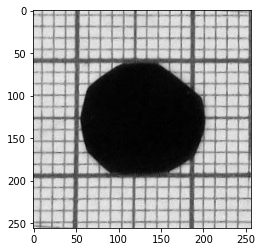

In [22]:
plt.imshow(choice(images), cmap='gray')

In [23]:
size = 256, 256
W = 50, 50

m = (size[0]//2 - W[0]//2)
n = (size[0]//2 + W[0]//2)
o = (size[1]//2 - W[1]//2)
p = (size[1]//2 + W[1]//2)

inner = images[:, m:n, o:p]
outter = images.copy()
outter[:, m:n, o:p] = np.nan
inner.shape, outter.shape

((432, 50, 50), (432, 256, 256))

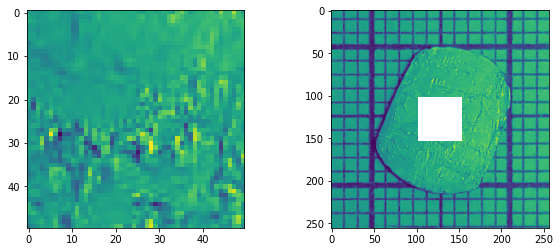

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
i = np.random.randint(0, len(images))
ax1.imshow(inner[i])
ax2.imshow(outter[i])

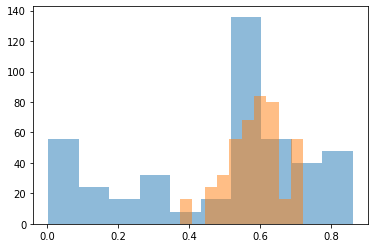

In [25]:
inner_mean = np.apply_over_axes(np.nanmean, inner, [1, 2]).flatten()
outter_mean = np.apply_over_axes(np.nanmean, outter, [1, 2]).flatten()
plt.hist(inner_mean, alpha=0.5, label='inner')
plt.hist(outter_mean, alpha=0.5, label='outter')
plt.show()

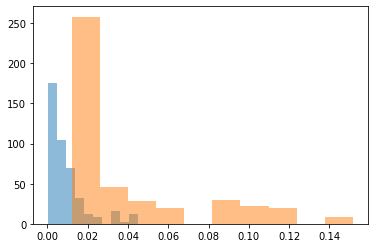

In [26]:
inner_std = np.apply_over_axes(np.nanstd, inner, [1, 2]).flatten()
outter_std = np.apply_over_axes(np.nanstd, outter, [1, 2]).flatten()
plt.hist(inner_std, alpha=0.5, label='inner')
plt.hist(outter_std, alpha=0.5, label='outter')
plt.show()

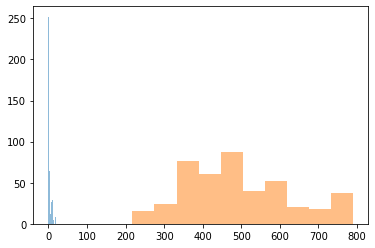

In [27]:
variance = lambda im: np.nansum([v**2 for v in np.gradient(im)])
inner_var = [variance(im) for im in inner]
outter_var =[variance(im) for im in outter]
plt.hist(inner_var, alpha=0.5, label='inner')
plt.hist(outter_var, alpha=0.5, label='outter')
plt.show()

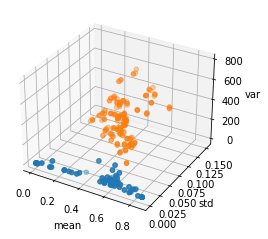

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(inner_mean, inner_std, inner_var, alpha=0.2)
ax.scatter(outter_mean, outter_std, outter_var, alpha=0.2)
ax.set_xlabel('mean')
ax.set_ylabel('std')
ax.set_zlabel('var')
plt.show()

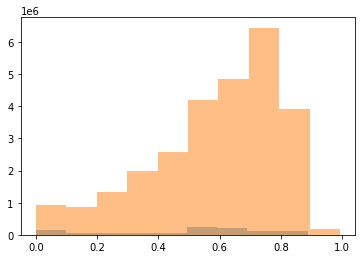

In [56]:
plt.hist(inner.flat, alpha=0.5)
plt.hist(outter.flat, alpha=0.5)
plt.show()

In [4]:
%time dataset['gabor'] = dataset.filename.apply(get, args=[True, norm])

CPU times: total: 1.92 s
Wall time: 6.4 s


In [17]:
segs = pd.DataFrame()
thres = [
    'threshold_isodata',
    'threshold_li',
    'threshold_mean',
    'threshold_minimum',
    'threshold_otsu',
    'threshold_triangle',
    'threshold_yen'
]
for threshold_name in thres:
    print(threshold_name)
    %time segs[threshold_name] = dataset.gabor.apply(lambda im: (im < getattr(filters, threshold_name)(im)).astype(int))

threshold_isodata
CPU times: total: 2.91 s
Wall time: 4.01 s
threshold_li
CPU times: total: 6.72 s
Wall time: 8.64 s
threshold_mean
CPU times: total: 406 ms
Wall time: 515 ms
threshold_minimum
CPU times: total: 12.6 s
Wall time: 16.7 s
threshold_otsu
CPU times: total: 3 s
Wall time: 3.84 s
threshold_triangle
CPU times: total: 3 s
Wall time: 3.74 s
threshold_yen
CPU times: total: 2.86 s
Wall time: 3.72 s


In [18]:
segs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   threshold_isodata   432 non-null    object
 1   threshold_li        432 non-null    object
 2   threshold_mean      432 non-null    object
 3   threshold_minimum   432 non-null    object
 4   threshold_otsu      432 non-null    object
 5   threshold_triangle  432 non-null    object
 6   threshold_yen       432 non-null    object
dtypes: object(7)
memory usage: 23.8+ KB


In [51]:
losses = {
    'inner':{'mean':[], 'std':[], 'var':[]},
    'outter':{'mean':[], 'std':[], 'var':[]}
}
for col in segs.columns:
    mask = np.array(segs[col].to_list())
    seg_inner = np.where(mask, images, np.nan)
    seg_outter = np.where(~mask, images, np.nan)
    losses['inner']['mean'].append(np.sum(np.abs(np.apply_over_axes(np.nanmean, seg_inner, [1, 2]).flatten() - inner_mean), axis=0))
    losses['inner']['std'].append(np.sum(np.abs(np.apply_over_axes(np.nanstd, seg_inner, [1, 2]).flatten() - inner_std), axis=0))
    losses['inner']['var'].append(np.sum([np.abs(variance(segin) - varin) for segin, varin in zip(seg_inner, inner_var)], axis=0))
    losses['outter']['mean'].append(np.sum(np.abs(np.apply_over_axes(np.nanmean, seg_outter, [1, 2]).flatten() - outter_mean), axis=0))
    losses['outter']['std'].append(np.sum(np.abs(np.apply_over_axes(np.nanstd, seg_outter, [1, 2]).flatten() - outter_std), axis=0))
    losses['outter']['var'].append(np.sum([np.abs(variance(segout) - varout) for segout, varout in zip(seg_outter, outter_var)], axis=0))

C:\Users\Cliente\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\shape_base.py:495: RuntimeWarning: Mean of empty slice
  res = func(*args)
C:\Users\Cliente\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [52]:
losses = pd.DataFrame(losses)

In [53]:
losses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, mean to var
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   inner   3 non-null      object
 1   outter  3 non-null      object
dtypes: object(2)
memory usage: 72.0+ bytes


In [54]:
losses.inner['mean']

[37.83932460439834,
 15.070209946734845,
 50.429417970634105,
 12.781445519085244,
 38.23205027379511,
 12.294484551192483,
 68.13971659321331]